In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [120]:
df=pd.read_csv(r"C:\ML\Kolkata_weather_data(2017-2022).csv")
df.isna().sum()

Address                   0
Date time                 0
Minimum Temperature       0
Maximum Temperature       0
Temperature               0
Dew Point                 0
Relative Humidity         0
Heat Index              340
Wind Speed                0
Wind Gust              2100
Wind Direction            0
Wind Chill             2178
Precipitation             0
Precipitation Cover       0
Snow Depth              365
Visibility                0
Cloud Cover               0
Sea Level Pressure        1
Weather Type              1
Latitude                  0
Longitude                 0
Resolved Address          0
Name                      0
Info                   2191
Conditions                0
dtype: int64

In [121]:
a=df[['Temperature','Wind Speed','Visibility','Cloud Cover'	,'Sea Level Pressure','Precipitation','Visibility','Relative Humidity']]
print(a.isna().sum())
print(a.info)
a

Temperature           0
Wind Speed            0
Visibility            0
Cloud Cover           0
Sea Level Pressure    1
Precipitation         0
Visibility            0
Relative Humidity     0
dtype: int64
<bound method DataFrame.info of       Temperature  Wind Speed  Visibility  Cloud Cover  Sea Level Pressure  \
0            19.9         5.8         1.2          4.9              1015.9   
1            20.6         8.1         1.4          0.3              1015.6   
2            21.1         9.2         1.6         10.7              1014.7   
3            19.9         8.1         1.8          2.3              1014.6   
4            19.6         8.1         1.9          0.0              1013.7   
...           ...         ...         ...          ...                 ...   
2186         24.9        10.3         1.4         33.4              1013.7   
2187         22.7         9.2         1.1          9.1              1015.1   
2188         20.0         6.9         1.5          6.1       

,Temperature,Wind Speed,Visibility,Cloud Cover,Sea Level Pressure,Precipitation,Visibility,Relative Humidity
0,19.9,5.8,1.2,4.9,1015.9,0.0,1.2,82.47
1,20.6,8.1,1.4,0.3,1015.6,0.0,1.4,76.76
2,21.1,9.2,1.6,10.7,1014.7,0.0,1.6,73.12
3,19.9,8.1,1.8,2.3,1014.6,0.0,1.8,72.57
4,19.6,8.1,1.9,0.0,1013.7,0.0,1.9,71.88
...,...,...,...,...,...,...,...,...
2186,24.9,10.3,1.4,33.4,1013.7,0.0,1.4,80.08
2187,22.7,9.2,1.1,9.1,1015.1,0.0,1.1,76.56
2188,20.0,6.9,1.5,6.1,1017.0,0.0,1.5,60.60
2189,20.2,5.8,1.3,5.5,1017.5,0.0,1.3,67.41


<Axes: >

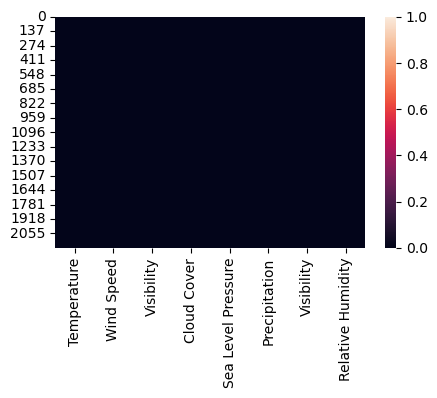

In [122]:
nan_values= a.isna()
plt.figure(figsize=(5,3))
sns.heatmap(nan_values)

In [123]:
# q1=a['Precipitation'].quantile(0.25)
# q3=a['Precipitation'].quantile(0.75)
# iqr=q3-q1
# min_range= q1-1.5*iqr
# max_range= q3+1.5*iqr
# print(min_range)
# print(max_range)

In [124]:
# a=a[(a['Precipitation']<=max_range) & (a['Precipitation']>=min_range)]
# print(a.shape)
# sns.boxplot(y=a['Precipitation'])
# plt.title('After Removing Outliers')

In [125]:
# q1=a['Wind Speed'].quantile(0.25)
# q3=a['Wind Speed'].quantile(0.75)
# iqr=q3-q1
# min_range= q1-1.5*iqr
# max_range= q3+1.5*iqr
# print(min_range)
# print(max_range)

In [126]:
# a=a[(a['Wind Speed']<=max_range) & (a['Wind Speed']>=min_range)]
# print(a.shape)
# sns.boxplot(y=a['Wind Speed'])
# plt.title('After Removing Outliers')

In [127]:
a=a.dropna()

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
x=a[list(a.drop(columns='Precipitation'))]
y=a.Precipitation
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42)


In [130]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [131]:
# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# Make predictions
y_predicted = model.predict(x_test_scaled)
print(y_test, y_predicted)


289      0.00
1693     2.43
1591    99.82
383      0.00
1819     0.00
        ...  
2074    13.17
744      0.00
879      0.00
1979     0.00
1170     0.00
Name: Precipitation, Length: 438, dtype: float64 [ 1.27899502e+00  5.25728601e+00  1.34680453e+01  2.93012418e+00
  2.65024791e+00 -9.25465313e+00  3.95802653e+00 -3.30507238e+00
  8.87579888e+00  2.02786787e+00  4.29077120e+00  2.13090687e+00
 -2.94950931e+00  1.12431826e+01  6.19798748e+00 -5.11046095e+00
  1.25910498e+01  4.84910535e+00  1.20479392e+01  8.63570097e+00
 -3.92433490e+00  8.10249847e-01 -2.92101571e+00  6.27847040e+00
  2.03574538e+00 -6.85536538e-01 -1.33881055e-01  1.77143338e+00
  2.41899899e+00 -4.18895119e+00  8.83707857e+00 -3.73515789e+00
  3.57047821e+00  6.59449240e+00  7.62391500e+00  1.93735743e+01
 -6.39286167e+00  1.22265409e+00  2.06368926e+00  1.25177227e+01
  8.65614553e+00  3.75069180e-01  1.62947507e+00 -2.32049885e-01
  3.84591081e+00 -8.19990911e+00  5.93636583e+00  1.29636398e+00
  1.06316195e+01 

Precipitaion prediction Accuracy=  13.91230526728262


[]

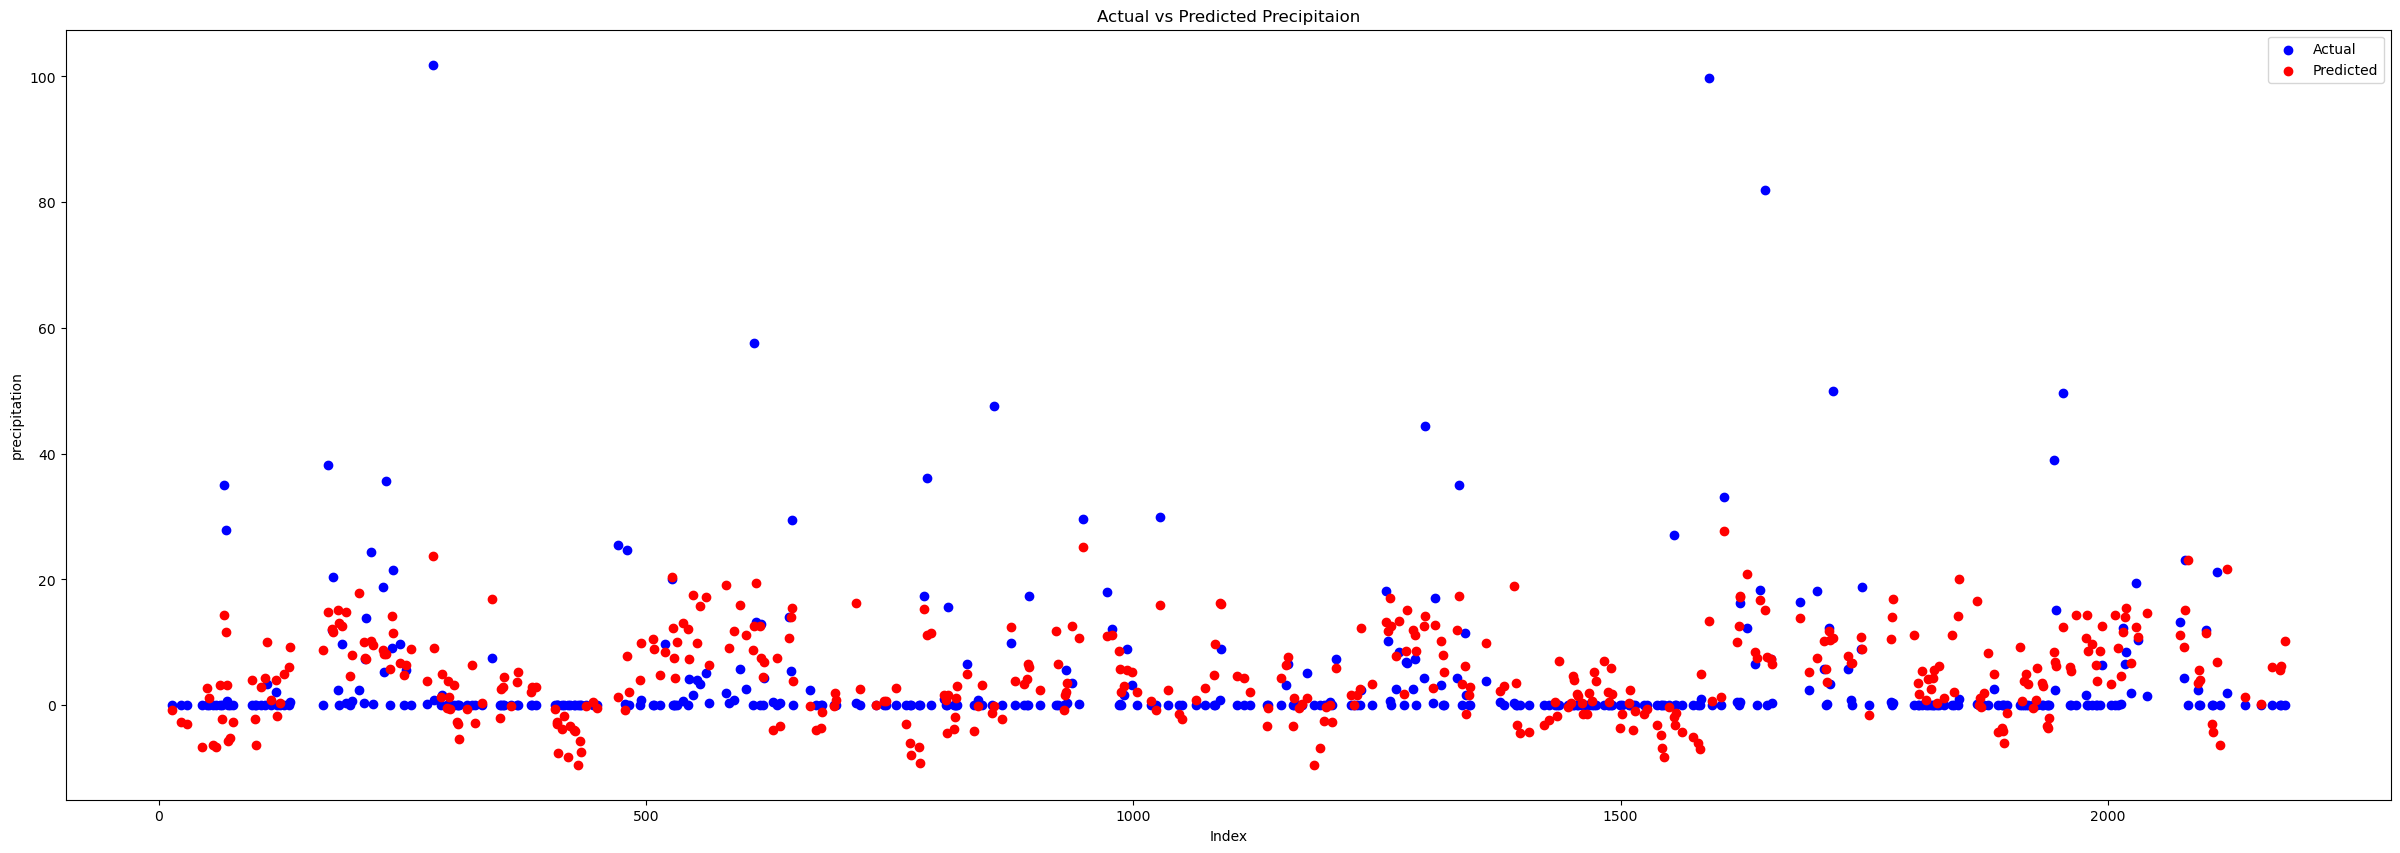

In [132]:
plt.figure(figsize=(30,10))
score=r2_score(y_test,y_predicted)
print("Precipitaion prediction Accuracy= ",score*100)
plt.scatter(x_test.index, y_test, color='blue', label='Actual')
plt.scatter(x_test.index, y_predicted, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('precipitation')
plt.legend()
plt.title('Actual vs Predicted Precipitaion')
plt.plot()

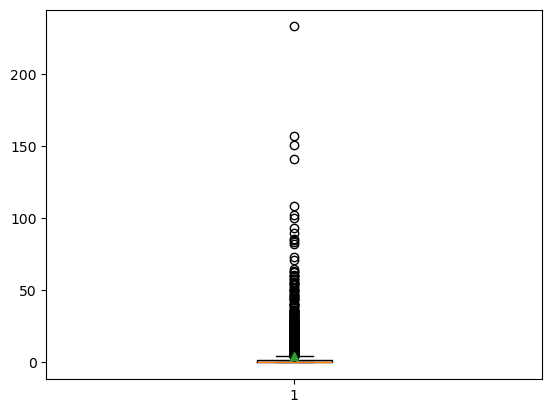

In [133]:
plt.figure()
plt.boxplot(a[['Precipitation']],showmeans=True)
plt.show()

## support vector machine 

In [135]:
x=a[list(a.drop(columns='Precipitation'))]
y=a.Precipitation

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state= 42)

In [137]:
'linear','poly','rbf','sigmoid'

('linear', 'poly', 'rbf', 'sigmoid')

In [138]:
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [139]:
sv=SVR(kernel='linear')
sv.fit(x_train,y_train)

SVR(kernel='linear')

In [140]:
sv.score(x_test, y_test)*100

1.1128561554994754